# 2.1. Problem Statement: Numpy

Problem Statement 1:-Write a function so that the columns of the output matrix are powers of
the input vector.
The order of the powers is determined by the increasing boolean argument. Specifically, when
increasing is False, the i-th output column is the input vector raised element-wise to the power
of N - i - 1.


In [1]:
import numpy as np

def func1(x,N):
    return np.column_stack([x**(N-i-1) for i in range(N)])

print(func1(np.array([1, 2, 3, 5]),3)) 

[[ 1  1  1]
 [ 4  2  1]
 [ 9  3  1]
 [25  5  1]]


Problem Statement 2:- Given a sequence of n values x1, x2, ..., xn and a window size k>0, the k-th moving average
of the given sequence is defined as follows:
The moving average sequence has n-k+1 elements as shown below.

The moving averages with k=4 of a ten-value sequence (n=10) is shown below

i 1 2 3 4 5 6 7 8 9 10
===== == == == == == == == == == ==
Input 10 20 30 40 50 60 70 80 90 100
y1 25 = (10+20+30+40)/4
y2 35 = (20+30+40+50)/4
y3 45 = (30+40+50+60)/4
y4 55 = (40+50+60+70)/4
y5 65 = (50+60+70+80)/4
y6 75 = (60+70+80+90)/4
y7 85 = (70+80+90+100)/4

Thus, the moving average sequence has n-k+1=10-4+1=7 values.

Question: Write a function to find moving average in an array over a window:
Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3.

In [2]:
import numpy as np
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n: - 1:] / n

x = np.array([3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150])
moving_average(x)

array([ 4.66666667,  5.66666667,  6.66666667,  9.66666667, 28.66666667,
       49.33333333, 72.66666667, 84.        , 93.33333333])

# 2.2. Problem Statement: Pandas

### Problem Statement 1

Problem 1:- How-to-count-distance-to-the-previous-zero
For each value, count the difference of the distance from the previous zero (or the start
of the Series, whichever is closer) and if there are no previous zeros, print the position

Consider a DataFrame df where there is an integer column {'X'[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}
The values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'.

import pandas as pd

df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

In [3]:
import numpy as np
import pandas as pd

s = pd.Series([7,2,0,3,4,2,5,0,3,4])
x = (s != 0).cumsum()
y = x != x.shift()
y.groupby((y != y.shift()).cumsum()).cumsum()


0    1.0
1    2.0
2    0.0
3    1.0
4    2.0
5    3.0
6    4.0
7    0.0
8    1.0
9    2.0
dtype: float64

Problem 2:- Create a DatetimeIndex that contains each business day of 2015 and use it to index a
Series of random numbers.

In [4]:
import pandas as pd
import numpy as np

dates = pd.date_range('1/1/2015', periods=261, freq='B')
df = pd.DataFrame(np.random.randn(261,1), index=dates)
df

,0
2015-01-01,-0.682880
2015-01-02,0.076786
2015-01-05,-0.577732
2015-01-06,1.086926
2015-01-07,-0.013960
2015-01-08,0.283578
2015-01-09,-0.012099
2015-01-12,0.147540
2015-01-13,-0.137358
2015-01-14,-0.451641


Problem 3:- Find the sum of the values in s for every Wednesday

In [5]:
import pandas as pd 
import numpy as np 

dates = pd.date_range('1/1/2015', periods=261, freq='B') 
df = pd.DataFrame(np.random.randn(261,1), index=dates) 

Sum_For_Wednesday = df.groupby(pd.Grouper(freq="W-WED")) 

Sum_For_Wednesday.sum()


,0
2015-01-07,-0.233952
2015-01-14,1.898781
2015-01-21,3.016145
2015-01-28,3.412285
2015-02-04,-0.148994
2015-02-11,1.499983
2015-02-18,0.571726
2015-02-25,0.969228
2015-03-04,3.143546
2015-03-11,-2.138268


Problem 4:- Average For each calendar month

In [6]:
import pandas as pd 
import numpy as np 

dates = pd.date_range('1/1/2015', periods=261, freq='B') 
df = pd.DataFrame(np.random.randn(261,1), index=dates) 
df.groupby(lambda x:(x.month)).mean()

,0
1,0.045244
2,0.131788
3,-0.405464
4,-0.176495
5,-0.141443
6,0.316338
7,0.107782
8,-0.115201
9,0.011560
10,-0.059569


Problem 5:- For each group of four consecutive calendar months in s, find the date on which the highest value occurred.


In [7]:
import pandas as pd 
import numpy as np 

dates = pd.date_range('1/1/2015', periods=261, freq='B') 
df = pd.DataFrame(np.random.randn(261,1), index=dates) 
df.groupby(lambda x:(x.year*10 + x.month%4)).agg(['max','idxmax'])

0           
            max     idxmax
20150  2.725591 2015-04-17
20151  2.694018 2015-05-18
20152  1.901255 2015-02-17
20153  1.847425 2015-07-28

### Problem Statement 2

Read the dataset from the below link
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Nam
es_right.csv

Questions:

Problem 1:- Delete unnamed columns

In [8]:
import pandas as pd
myData = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')

del myData['Unnamed: 0']
print(myData)

              Id       Name  Year Gender State  Count
0          11350       Emma  2004      F    AK     62
1          11351    Madison  2004      F    AK     48
2          11352     Hannah  2004      F    AK     46
3          11353      Grace  2004      F    AK     44
4          11354      Emily  2004      F    AK     41
5          11355    Abigail  2004      F    AK     37
6          11356     Olivia  2004      F    AK     33
7          11357   Isabella  2004      F    AK     30
8          11358     Alyssa  2004      F    AK     29
9          11359     Sophia  2004      F    AK     28
10         11360     Alexis  2004      F    AK     27
11         11361  Elizabeth  2004      F    AK     27
12         11362     Hailey  2004      F    AK     27
13         11363       Anna  2004      F    AK     26
14         11364    Natalie  2004      F    AK     25
15         11365      Sarah  2004      F    AK     25
16         11366     Sydney  2004      F    AK     25
17         11367        Ava 

Problem 2:- Show the distribution of male and female

In [9]:
myData['Gender']

0          F
1          F
2          F
3          F
4          F
5          F
6          F
7          F
8          F
9          F
10         F
11         F
12         F
13         F
14         F
15         F
16         F
17         F
18         F
19         F
20         F
21         F
22         F
23         F
24         F
25         F
26         F
27         F
28         F
29         F
          ..
1016365    M
1016366    M
1016367    M
1016368    M
1016369    M
1016370    M
1016371    M
1016372    M
1016373    M
1016374    M
1016375    M
1016376    M
1016377    M
1016378    M
1016379    M
1016380    M
1016381    M
1016382    M
1016383    M
1016384    M
1016385    M
1016386    M
1016387    M
1016388    M
1016389    M
1016390    M
1016391    M
1016392    M
1016393    M
1016394    M
Name: Gender, Length: 1016395, dtype: object

Problem 3:- Show the top 5 most preferred names

In [10]:
myData["Name"].head(5)

0       Emma
1    Madison
2     Hannah
3      Grace
4      Emily
Name: Name, dtype: object

Problem 4:- What is the median name occurrence in the dataset

In [11]:
myData['Name'] = abs(myData['Count'] - myData['Count'].median())
myData['Name'].median()

6.0

Problem 5:- Distribution of male and female born count by states

In [12]:
counts = myData.groupby(['State','Gender']).count()
print(counts)

                 Id   Name   Year  Count
State Gender                            
AK    F        2404   2404   2404   2404
      M        2587   2587   2587   2587
AL    F        9878   9878   9878   9878
      M        8419   8419   8419   8419
AR    F        7171   7171   7171   7171
      M        6475   6475   6475   6475
AZ    F       14518  14518  14518  14518
      M       10820  10820  10820  10820
CA    F       45144  45144  45144  45144
      M       31637  31637  31637  31637
CO    F       11424  11424  11424  11424
      M        9183   9183   9183   9183
CT    F        6575   6575   6575   6575
      M        5733   5733   5733   5733
DC    F        3053   3053   3053   3053
      M        3000   3000   3000   3000
DE    F        2549   2549   2549   2549
      M        2440   2440   2440   2440
FL    F       25781  25781  25781  25781
      M       20070  20070  20070  20070
GA    F       19385  19385  19385  19385
      M       15454  15454  15454  15454
HI    F        3

# 2.3. Problem Statement: Use Cases on Numpy and Pandas

Problem 1:- Write a Python program which accepts a list named : randomList = ['a', 0, 2]. Use exception
handling using try-catch which gives the output as:
    
Output:

1) If the List element is a alphabet or string, the output will be
The entry is a
Oops! <class 'ValueError'> occured.
Next entry.

2) If the List element is “0”,the output will be
The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.

3) If the List element is and integer except 0,then output will be:
The entry is 2
The reciprocal of 2 is 0.5 // reciprocal of an integer

In [13]:

import sys

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        break
    except:
        print("Oops!",sys.exc_info()[0],"occured.")
        print("Next entry.")
        print()
print("The reciprocal of",entry,"is",r)

The entry is a
Oops! <class 'ValueError'> occured.
Next entry.

The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.

The entry is 2
The reciprocal of 2 is 0.5


Problem 2:- Array out of Bound Exception
Write a Python program to give exception “Array Out of Bound” if the user wants to access the
elements beyond the list size (use try and except)

In [14]:
class Array_out_of_bound(BaseException):
    def __init__(self, arg):
        print(arg)




def arrayOutOfBondEx(array):
    while True:
        try:
            indexOnList= int(input('Enter the index of number:- '))
            if len(array) < indexOnList:
                raise Array_out_of_bound("Array Out Of Bound Exception")
            
        except Array_out_of_bound:
            print("Please enter number below ",len(array))
            continue
        except:
            print("Oops, Somthing went wrong, Please check input given by you")
            continue
        else:
            print("Entered index is available in list {}".format(array[indexOnList]))
            break
        


arrayOutOfBondEx([12,13,3,4,1,3,4,3,2])

Enter the index of number:- 13
Array Out Of Bound Exception
Please enter number below  9
Enter the index of number:- 1
Entered index is available in list 13


Problem 3:- Write a python module script that contains fib2() method to calculate the Fibonacci series
till 1000 and save it as fibo.py.

Note : The module created as fibo.py has to be placed in lib folder
For linux/ubuntu path = /home/anaconda/lib/python3
For Windows path = C:\Users\Ajit\Anaconda3\Lib

In [15]:
#Changeing Current work directory to 
import os
os.chdir('C:\\Users\\utkar\\Anaconda3\\Lib')

In [16]:
%%writefile fibo.py

def fib2(num):   
    result = []
    a, b = 0, 1
    while b < num:
        result.append(b)
        a, b = b, a+b
    return result

Overwriting fibo.py


In [17]:
import fibo 
print(fibo.fib2(1000))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]


Problem 4:-Write a python module script that contains ispalindrome() method to calculate the input
string as palindrome string or not and save it as palindrome.py.

In [18]:
%%writefile palindromeLib.py

def ispalindrome(word):
    reverseWord = word[::-1]
    if (reverseWord == word):
        return True
    return False
    

Overwriting palindromeLib.py


In [19]:
import palindromeLib

word = input("Enter word to check its palindrome or not :-")
print("%s is Palindrome : %s" % (word , palindromeLib.ispalindrome(word)))

Enter word to check its palindrome or not :-12221
12221 is Palindrome : True


Problem 5:- Write a program in Python with one class called Cipher. Within the constructor of this
class, ask user for a string and store it. Use a static variable, key to store a randomly
generated integer between 1 and 50 inclusive. Implement two methods, encrypt and
decrypt within this class. Encrypt generates and prints a cipher text using the user-entered
string and the key and ecrypt generates decrypted string from ciphertext. The cipher only
encrypts alpha and numeric (A-Z, a-z, 0-9). All Symbols, such as - , ; %, remain unencrypted.
The cipher text can have special characters. Use generator expression to filter out alpha and
numeric characters of the input string and to generate cipher text. Create an instance of this
class, encrypt and decrypt back the user entered string.

In [20]:
import random

class Cipher():
    
    key = random.randint(1,50)
    
    def __init__(self):
        self.varString = input("Enter String to encrypt :- ")
        
    
    
    def encryptFunc(self,key):
        
        encryptText=''.join(chr((ord(char) + key - 65) % 26 + 65) if char.isupper() else chr((ord(char) + key - 97) % 26 + 97) if char.islower() else char for char in self.varString)      
        print(encryptText)
        return encryptText
        #return ''.join(chr((ord(char) + self.key - 65) % 26 + 65) if char.isupper() else chr((ord(char) + key - 97) % 26 + 97) if char.islower() else char for char in self.varString)      
         
    
    def decryptFunc(self, encrytedVar,key):
        return ''.join(chr((ord(char) + (26-key) - 65) % 26 + 65) if char.isupper() else chr((ord(char) + (26-key) - 97) % 26 + 97) if char.islower() else char for char in encrytedVar)      

obj= Cipher()

encryted= obj.encryptFunc(obj.key)

print(obj.decryptFunc(encryted,obj.key))
  

Enter String to encrypt :- testing%%STring
kvjkzex%%JKizex
testing%%STring


# 2.4. Problem Statement: Matplotlib

Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)

Problem 1:- Create a pie chart presenting the male/female proportion

In [21]:
import numpy as np
import pandas as pd
myPichart = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
y = myPichart['sex']
genderGroup = y.value_counts()

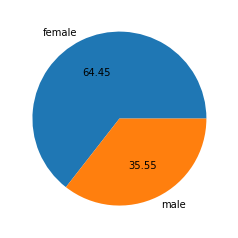

In [23]:
import matplotlib.pyplot as plt
plt.figure()
values = [845,466] 
labels = ['female', 'male'] 
plt.pie(values, labels=labels, autopct='%.2f')
plt.show()

Problem 2:- Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

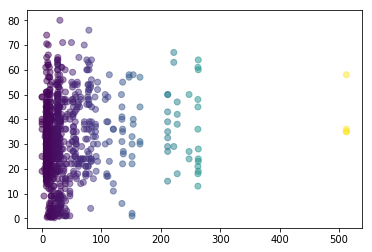

In [24]:
import matplotlib.pyplot as plt
fairPaidData = myPichart['fare']
ageData = myPichart['age']
scatter_plot = plt.scatter(fairPaidData, ageData, alpha=0.5, c=fairPaidData)
plt.show()

# 2.5. Problem Statement: Data Cleaning

It happens all the time: someone gives you data containing malformed strings, Python, lists
and missing data. How do you tidy it up so you can get on with the analysis?
Take this monstrosity as the DataFrame to use in the following puzzles:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',

'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],

'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})

Problem 1:- Some values in the the FlightNumber column are missing. These numbers are meant to
increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
numbers and make the column an integer column (instead of a float column).

In [25]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )','12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [26]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


Problem 2:- The From_To column would be better as two separate columns! Split each string on the
underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the
correct column names to this temporary DataFrame.

In [ ]:
splitedData = df['From_To'].str.split("_")
splitedData.columns = ["From", "True"]
splitedData

Problem 3:- Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.
Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become
"London".)

In [ ]:
splitedData['From'] = df_temp.From.str.title()
splitedData['To'] = df_temp.To.str.title()
splitedData

Problem 4:- Delete the From_To column from df and attach the temporary DataFrame from the previous
questions.

In [ ]:
df.drop(['From_To'], axis=1)

Problem 5:- In the RecentDelays column, the values have been entered into the DataFrame as a list. We
would like each first value in its own column, each second value in its own column, and so on. If
there isn't an Nth value, the value should be NaN.

In [ ]:
delayCol = pd.DataFrame(df['RecentDelays'].values.tolist(), columns=['delay_1', 'delay_2', 'delay_3'])
delayCol

In [ ]:
df.drop(['RecentDelays'], axis=1)
df = pd.concat([df, delayCol], axis=1,join_axes=[df.index])
df

# 2.6. Problem Statement: Pandas SQL

Problem statement 1:
Read the following data set:
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
Rename the columns as per the description from this file:
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

Task:
Create a sql db from adult dataset and name it sqladb

In [ ]:
import csv
import mysql-connector
db = mysql.connector.connect(
host="localhost"
)

cursor = mydb.cursor()

cursor.execute("CREATE DATABASE sqladb")
cursor.execute("USE sqladb")

cursor.execute("CREATE TABLE adultTable (age INT(2),workclass VARCHAR(255), fnlwgt INT(5), education VARCHAR(255), education-num INT(5), marital-status VARCHAR(255), occupation VARCHAR(255), relationship VARCHAR(255), race VARCHAR(255), sex VARCHAR(255), capital-gain INT(20), capital-loss INT(20), hours-per-week INT(20), native-country VARCHAR(255) )", moreThan50K VARCHAR(255))

table_data = csv.reader(file('sample.csv'))
for row in table_data:
  cursor.execute('INSERT INTO adultTable VALUES("%s", "%s", "%s", "%s", "%s", "%s", "%s", "%s", "%s", "%s", "%s", "%s", "%s", "%s", "%s")',row)

db.commit()

Problem 1:- Select 10 records from the adult sqladb

In [ ]:
cursor.execute("SELECT * FROM adultTable LIMIT 10")
myresult = cursor.fetchall()
for x in myresult:
print(x)

Problem 2:- Show me the average hours per week of all men who are working in private sector

In [ ]:
cursor.execute("SELECT AVG(hours-per-week) average-hours-per-week FROM adultTable WHERE workclass = 'Private' ")
myresult = cursor.fetchall()
for x in myresult:
print(x)

Problem 3:- Show me the frequency table for education, occupation and relationship, separately

In [ ]:
cursor.execute("SELECT education , COUNT(education) frequency FROM adultTable GROUP BY education ")
myresult = cursor.fetchall()
for x in myresult:
print(x)

In [ ]:
cursor.execute("SELECT occupation, COUNT(occupation) frequency FROM adultTable GROUP BY occupation ")
myresult = cursor.fetchall()
for x in myresult:
print(x)

In [ ]:
cursor.execute("SELECT relationship, COUNT(relationship) frequency FROM adultTable GROUP BY relationship ")
myresult = cursor.fetchall()
for x in myresult:
print(x)

Problem 4:- Are there any people who are married, working in private sector and having a master’s
degree

In [ ]:
cursor.execute("SELECT IF(count > 0, 'Yes', 'No') _exist FROM ( SELECT COUNT(marital_status) count FROM adultTable WHERE marital-status IN ('Married-civ-spouse', 'Married-spouse-absent' , 'Married-AF-spouse')) alias ")
myresult = cursor.fetchall()
for x in myresult:
print(x)

Problem 5:- What is the average, minimum and maximum age group for people working in
different sectors

In [ ]:
cursor.execute(" SELECT workclass as sector, AVG(age) averageAge, MIN(age) minAge, MAX(age) maxAge  FROM adultTable GROUP BY workclass ")
myresult = cursor.fetchall()
for x in myresult:
print(x)